Data Source: https://www.kaggle.com/c/bike-sharing-demand

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

In [24]:
bike_df = pd.read_csv('~/aiffel/data/bike_train.csv')

In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [26]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [28]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [29]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['dayofweek'] = bike_df['datetime'].dt.dayofweek

In [30]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [31]:
bike_df.drop(['datetime'], axis = 1, inplace = True)
bike_df.drop(['year'], axis = 1, inplace = True)


In [32]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5


<Axes: xlabel='dayofweek', ylabel='Count'>

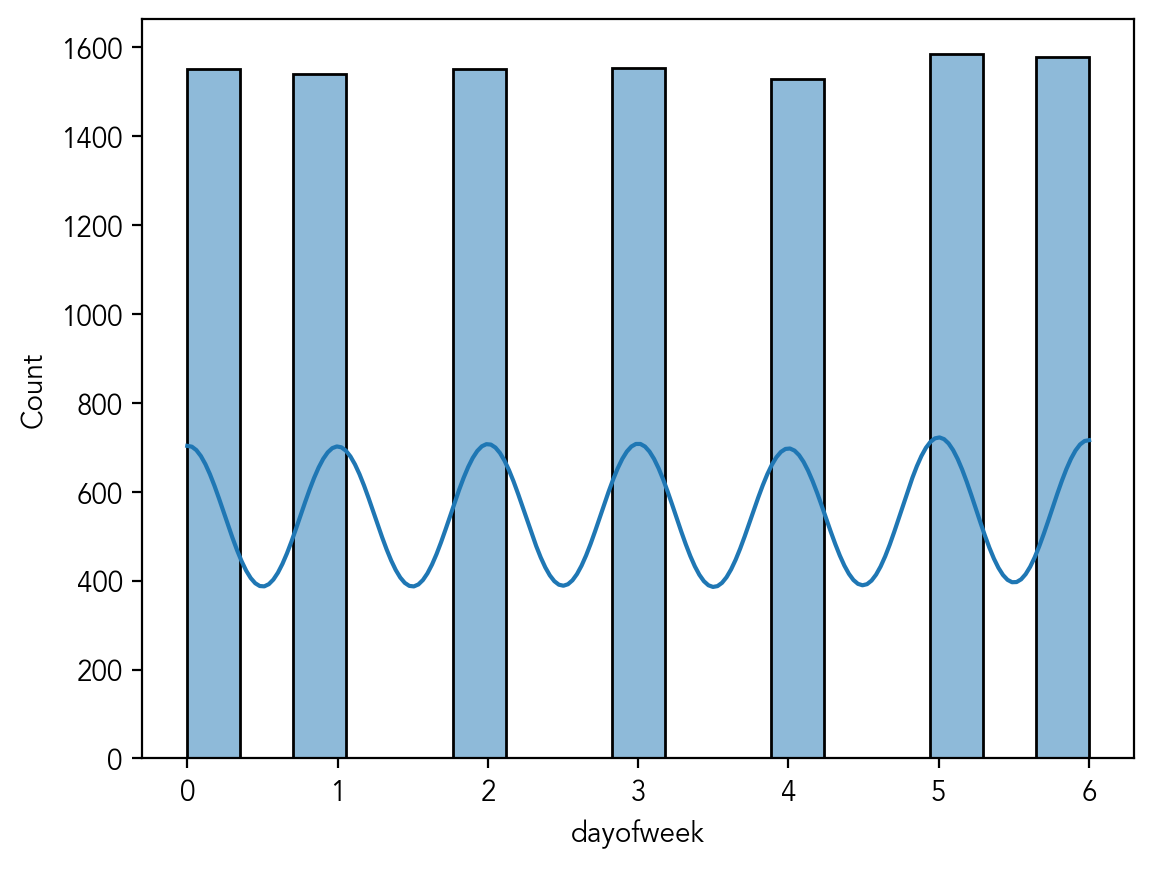

In [33]:
sns.histplot(data = bike_df, x = 'dayofweek', kde = True)

<Axes: >

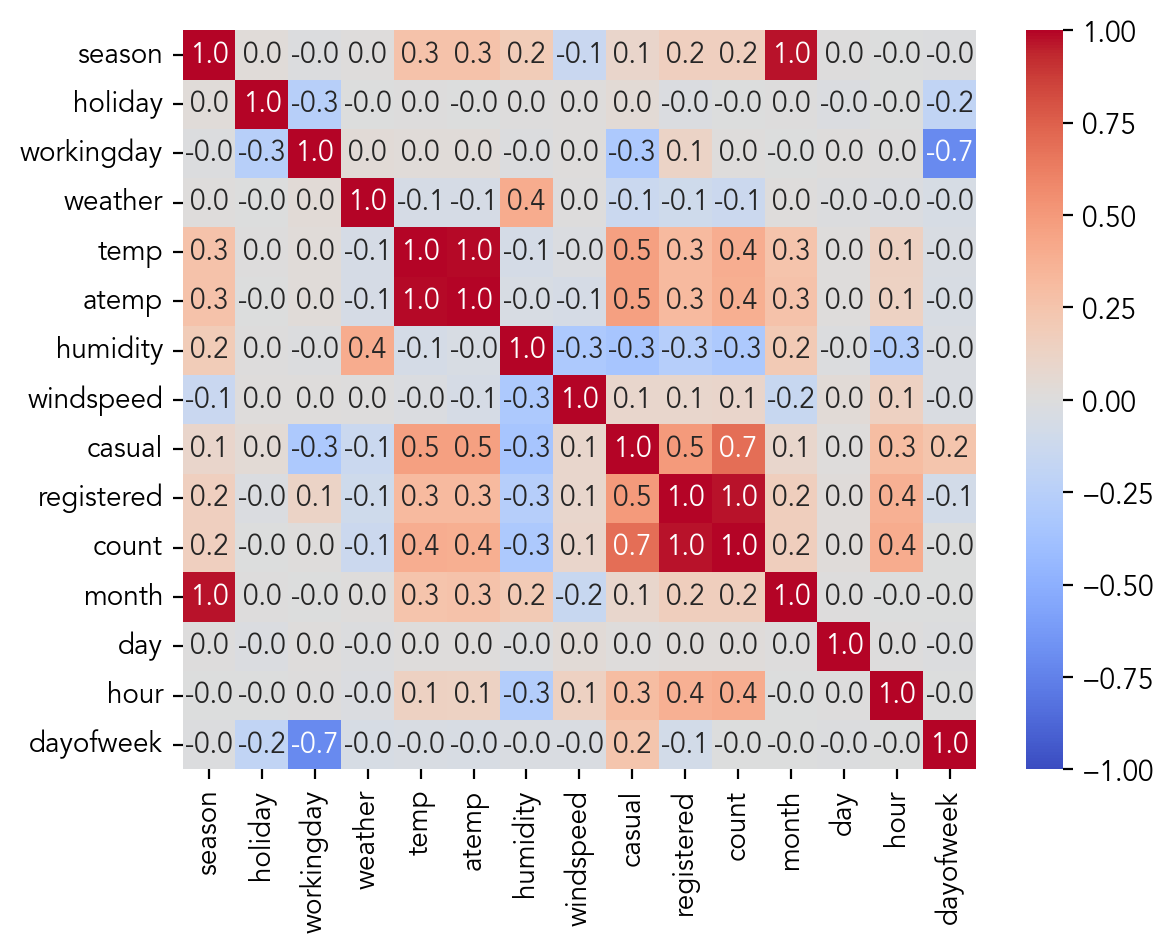

In [34]:
corr = bike_df.corr()
sns.heatmap(corr, annot = True, fmt = '.1f', cmap = 'coolwarm', vmax = 1, vmin = -1)

In [35]:
pd.read_csv('~/aiffel/data/bike_test.csv')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [36]:
bike_df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [37]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4,5


In [38]:
bike_df_scale = bike_df.copy()

In [39]:
bike_df_scale.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4,5


In [40]:
from sklearn.preprocessing import StandardScaler
bike_df_scale[['temp', 'atemp', 'humidity', 'windspeed']] = StandardScaler().fit_transform(bike_df_scale[['temp', 'atemp', 'humidity', 'windspeed']])

In [41]:
bike_df_scale.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,3.133020e-16,-2.193114e-16,1.148774e-16,-5.221699e-17,191.574132,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,181.144454,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,-2.491372e+00,-2.701736e+00,-3.215858e+00,-1.567754e+00,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,-8.074281e-01,-8.248654e-01,-7.735577e-01,-7.101642e-01,42.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,3.454398e-02,6.902305e-02,5.899992e-03,2.432639e-02,145.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,7.712696e-01,8.738177e-01,7.853577e-01,5.142603e-01,284.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,2.665707e+00,2.572501e+00,1.980526e+00,5.413599e+00,977.000000,12.000000,19.000000,23.000000,6.000000


In [42]:
bike_df_scale.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour,dayofweek
0,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,16,1,1,0,5
1,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,40,1,1,1,5
2,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,32,1,1,2,5
3,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,13,1,1,3,5
4,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1,1,1,4,5


In [43]:
X = bike_df_scale.drop(['count'], axis =1)
y = bike_df_scale['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2024)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 12), (3266, 12), (7620,), (3266,))

## Linear Regression

In [44]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
pred_linear = model_linear.predict(X_test)

In [45]:
min(pred_linear), max(pred_linear)

(-91.50956062237373, 436.17179065381856)

<Axes: xlabel='count'>

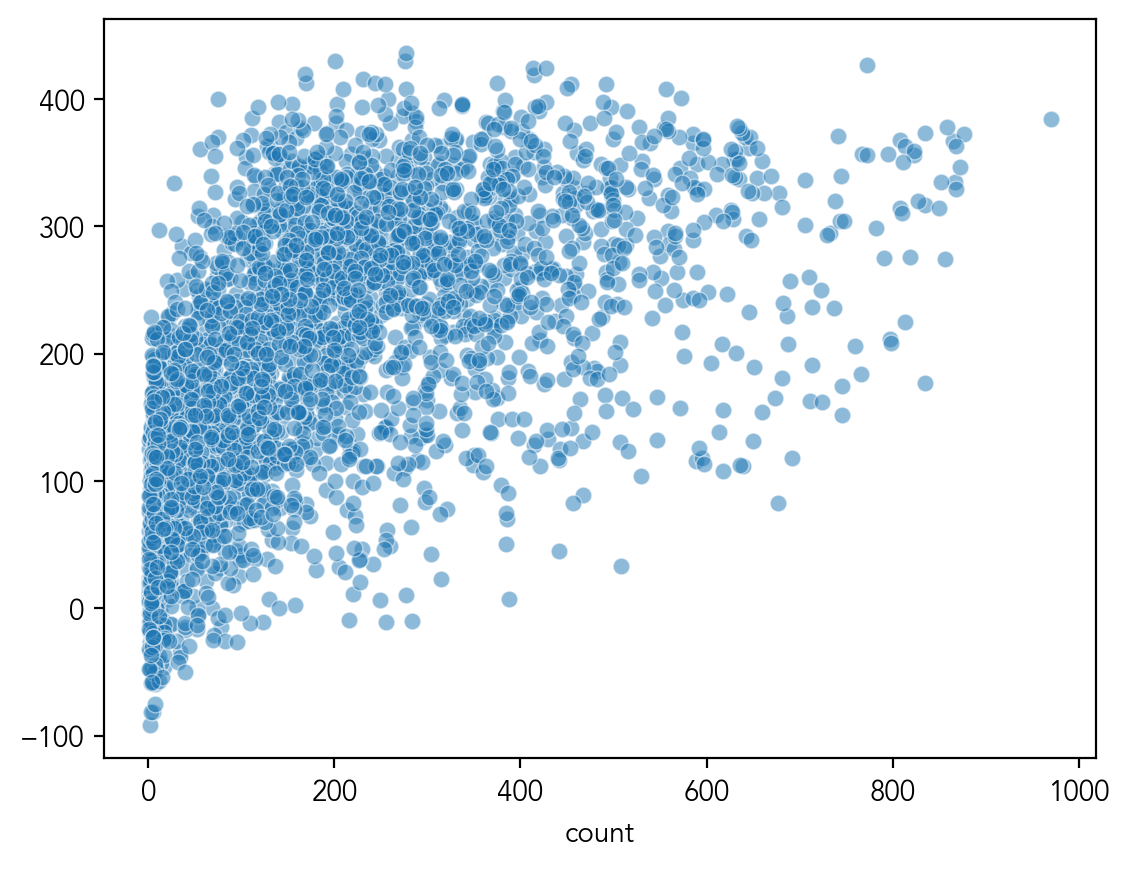

In [71]:
sns.scatterplot(x = y_test, y = pred_linear, alpha = 0.5)

Text(0, 0.5, 'Predicted Count')

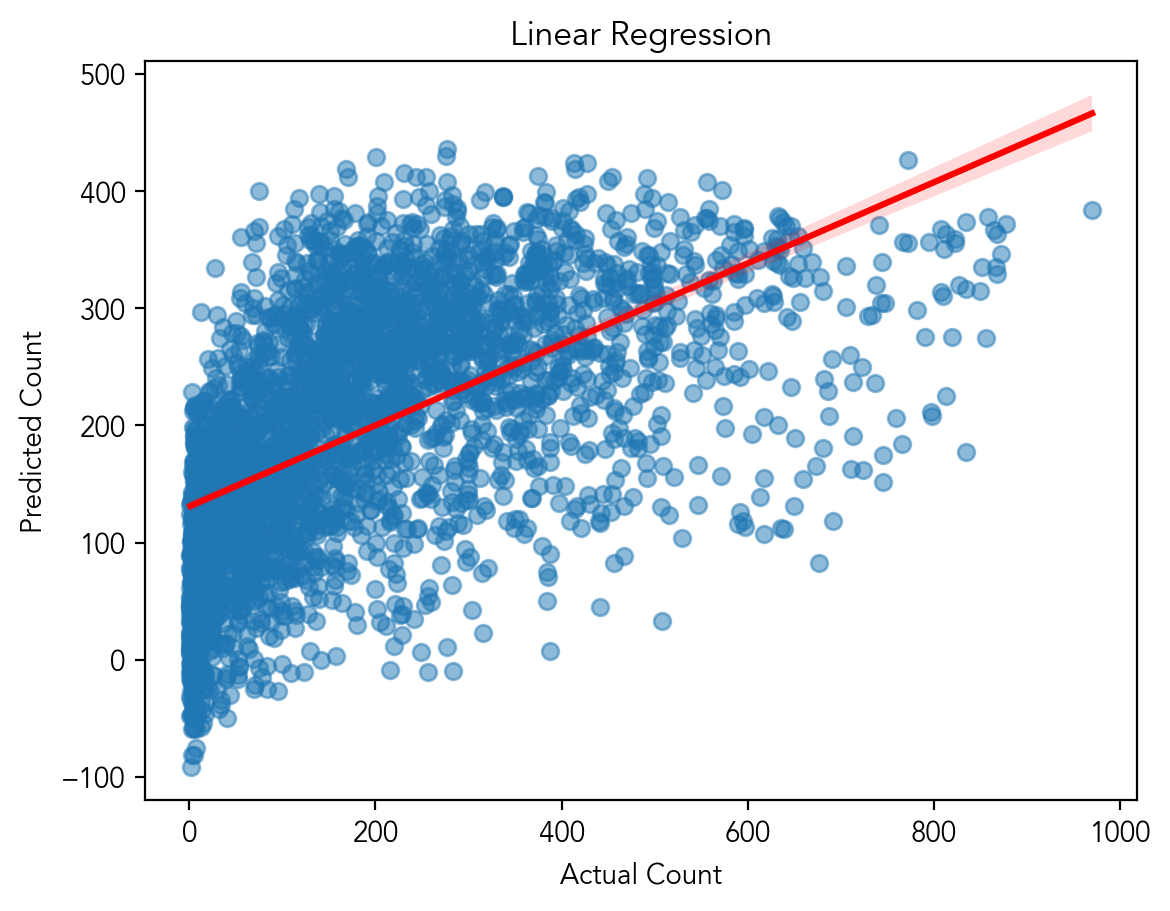

In [77]:
sns.regplot(data = bike_df_scale, x = y_test, y = pred_linear,line_kws = {'color' : 'red'}, scatter_kws = {'alpha' : 0.5})
plt.title('Linear Regression')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')

In [47]:
print('MAE:', mean_absolute_error(y_test, pred_linear))
print('MSE:', mean_squared_error(y_test, pred_linear))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_linear)))
# print('MSLE:', mean_squared_log_error(y_test, pred_linear))
# print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred_linear)))
print('R-squared:', r2_score(y_test, pred_linear))

MAE: 107.76424165324535
MSE: 20670.639209962417
RMSE: 143.77287369306637
R-squared: 0.32978487571170256


## Random Forest Regressor

In [48]:
model_rfr = RandomForestRegressor(n_estimators = 100, random_state = 2024)
model_rfr.fit(X_train, y_train)
pred_rfr = model_rfr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, pred_rfr))
print('MSE:', mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_rfr)))
print('MSLE:', mean_squared_log_error(y_test, pred_rfr))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred_rfr)))
print('R-squared:', r2_score(y_test, pred_rfr))

MAE: 41.25911206368647
MSE: 3851.7419600734843
RMSE: 62.062403756811456
MSLE: 0.1597030069048039
RMSLE: 0.3996285861957374
R-squared: 0.8751129227173138


<Axes: xlabel='count'>

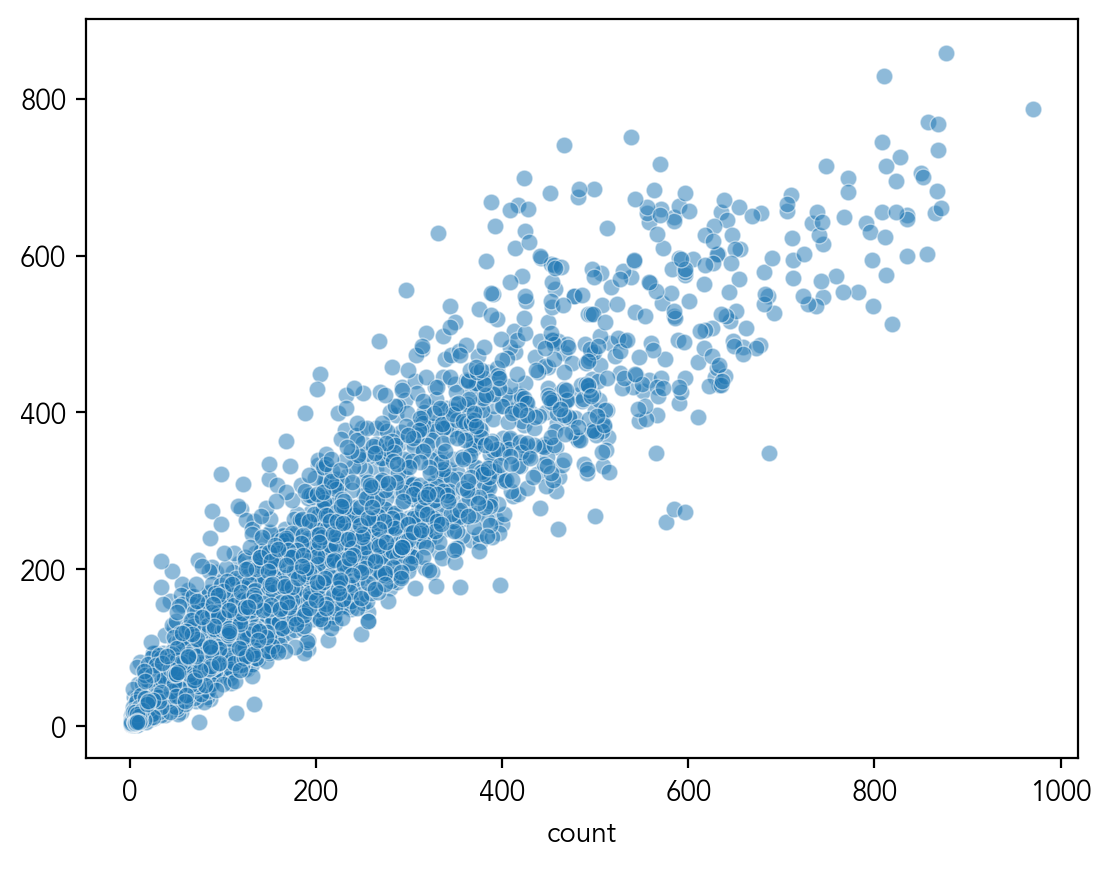

In [70]:
sns.scatterplot(x = y_test, y = pred_rfr, alpha = 0.5)

Text(0, 0.5, 'Predicted Count')

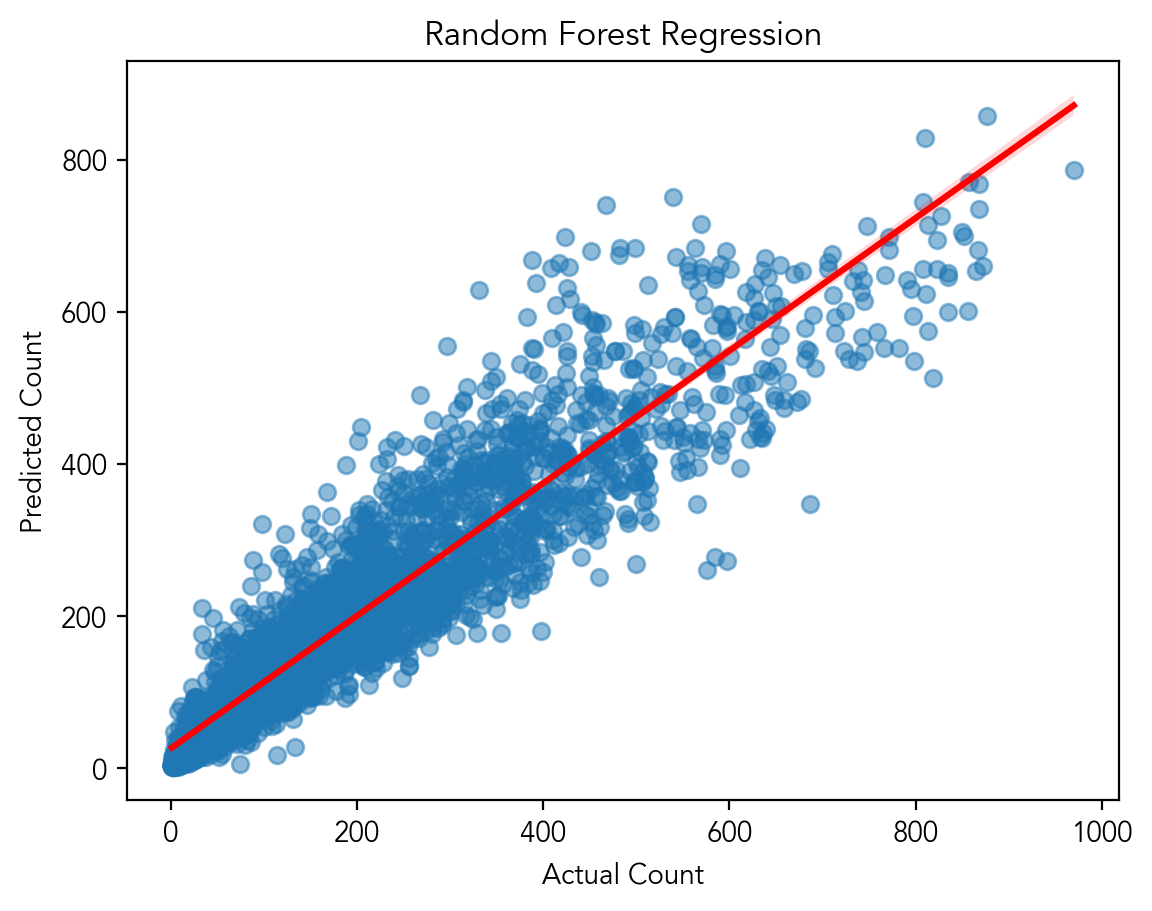

In [79]:
sns.regplot(data = bike_df_scale, x = y_test, y = pred_rfr,line_kws = {'color' : 'red'}, scatter_kws = {'alpha' : 0.5})
plt.title('Random Forest Regression')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')

## XGBRegressor

In [81]:
model_xgb = XGBRegressor(n_estimators = 100, random_state = 2024)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
print('MAE:', mean_absolute_error(y_test, pred_xgb))
print('MSE:', mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_xgb)))
# print('MSLE:', mean_squared_log_error(y_test, pred_xgb))
# print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred_xgb)))
print('R-squared:', r2_score(y_test, pred_xgb))

MAE: 37.152902391006336
MSE: 3036.7494571237025
RMSE: 55.106709728704566
R-squared: 0.9015378579169597


<Axes: xlabel='count'>

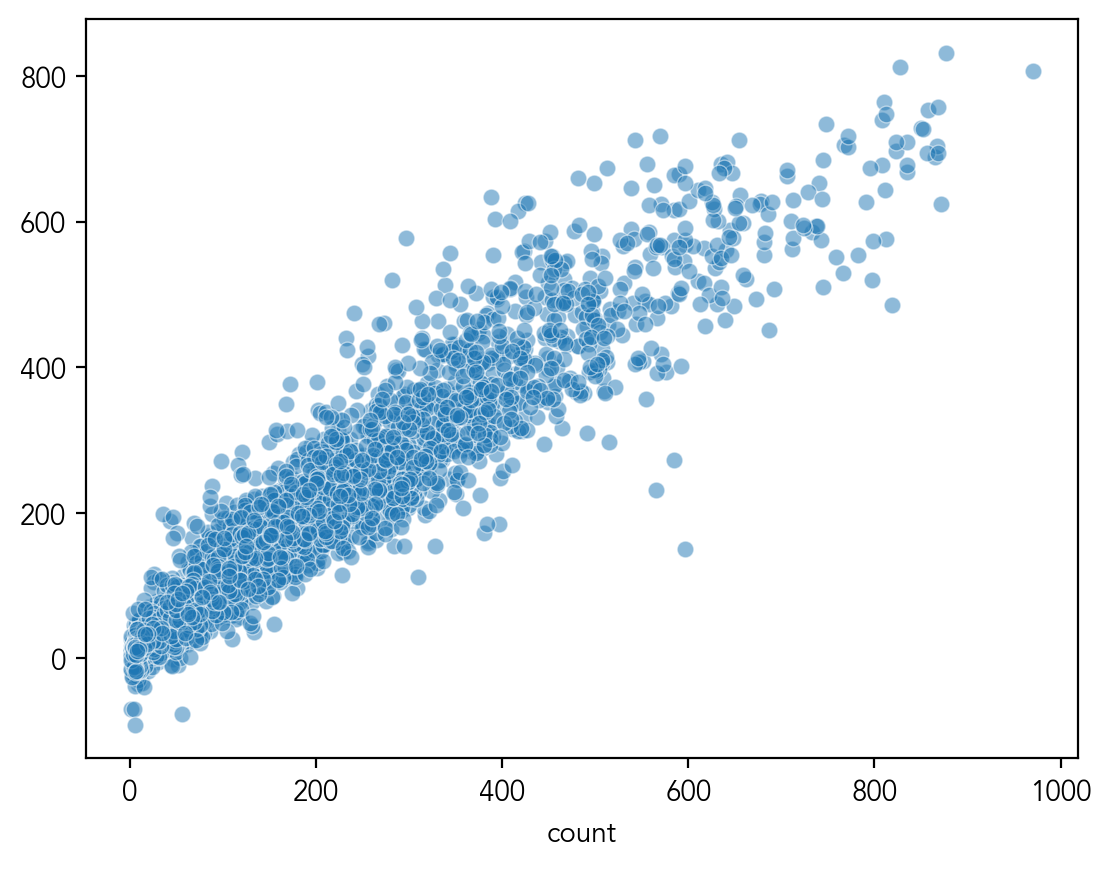

In [82]:
sns.scatterplot(x = y_test, y = pred_xgb, alpha = 0.5)

Text(0, 0.5, 'Predicted Count')

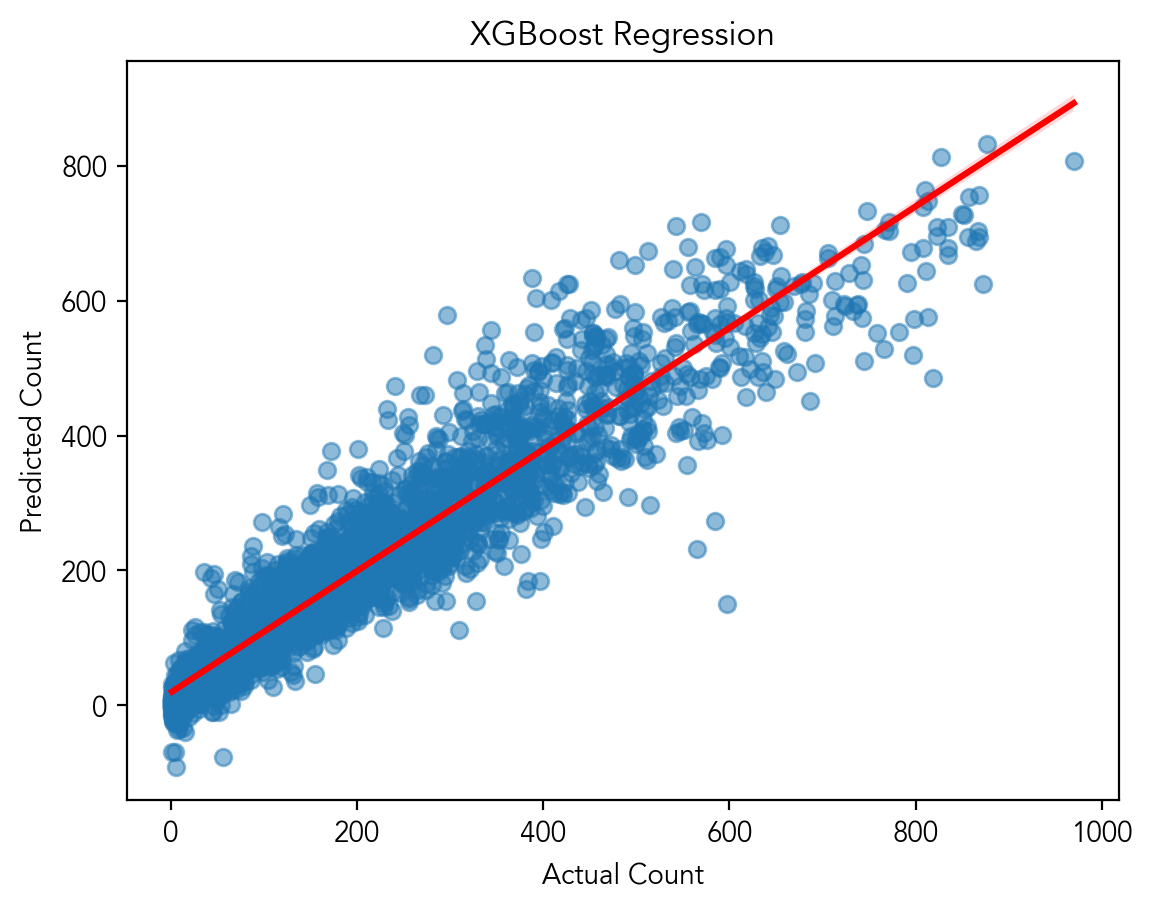

In [83]:
sns.regplot(data = bike_df_scale, x = y_test, y = pred_xgb,line_kws = {'color' : 'red'}, scatter_kws = {'alpha' : 0.5})
plt.title('XGBoost Regression')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')

## Hyperparameter Tuning

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


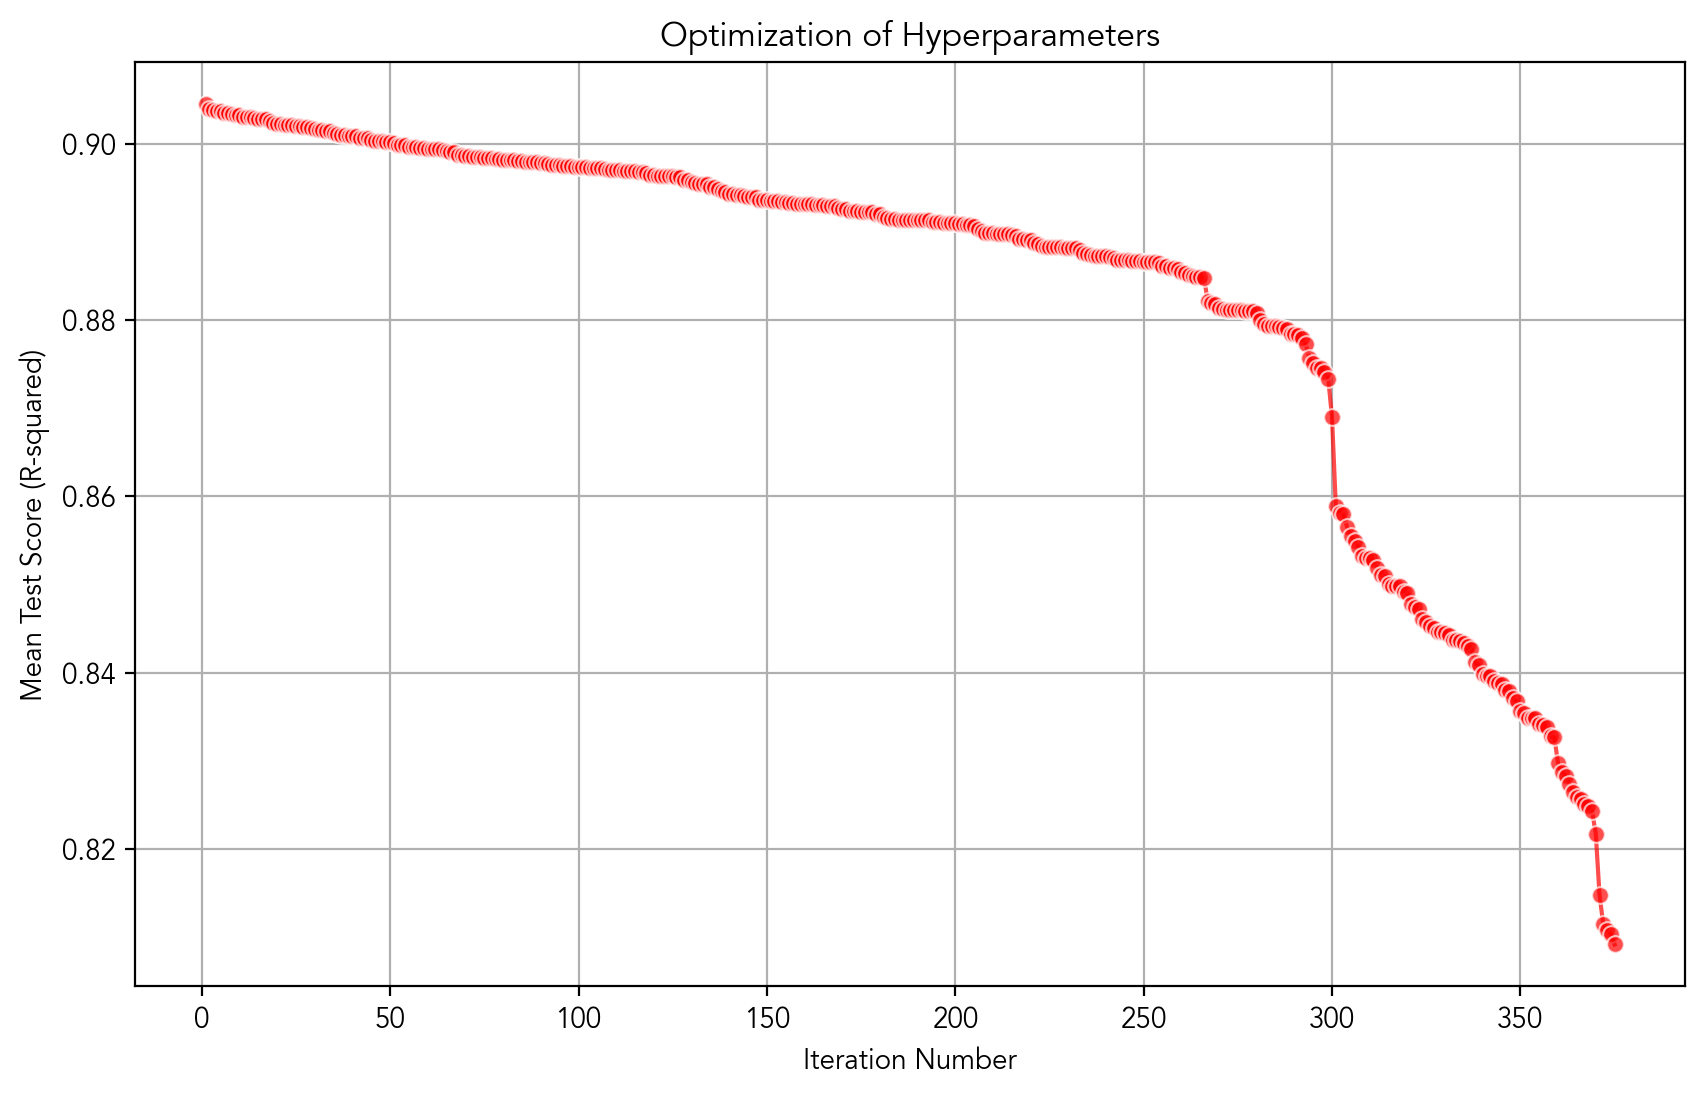

{'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 700, 'subsample': 0.9}

In [87]:
params={'learning_rate':[0.09, 0.07, 0.05], 
        'max_depth':[3, 5, 7, 9, 11], 
        'n_estimators':[300, 400, 500, 600, 700],
        'subsample':[1.0, 0.9, 0.8, 0.7, 0.6]
        }

model_xgb = XGBRegressor()
grid = GridSearchCV(model_xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

results = grid.cv_results_
scores = pd.DataFrame(results).sort_values(by='rank_test_score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=scores, x = 'rank_test_score', y = 'mean_test_score', marker='o', linestyle='-', color='r', alpha=0.7)
plt.title('Optimization of Hyperparameters')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Test Score (R-squared)')
plt.grid(True)
plt.show()

grid.best_params_

In [84]:
model_xgb = XGBRegressor(
    learning_rate = 0.07, 
    max_depth = 7, 
    n_estimators = 700, 
    subsample = 0.9,
    random_state = 2024)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
print('MAE:', mean_absolute_error(y_test, pred_xgb))
print('MSE:', mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_xgb)))
# print('MSLE:', mean_squared_log_error(y_test, pred_xgb))
# print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, pred_xgb)))
print('R-squared:', r2_score(y_test, pred_xgb))

MAE: 32.33980776323946
MSE: 2421.6269395126046
RMSE: 49.210028850962935
R-squared: 0.9214823023245888


In [ ]:
MAE: 35.658951274491734
MSE: 2904.9495160676956
RMSE: 53.897583582825824
R-squared: 0.9058112774749514

<Axes: xlabel='count'>

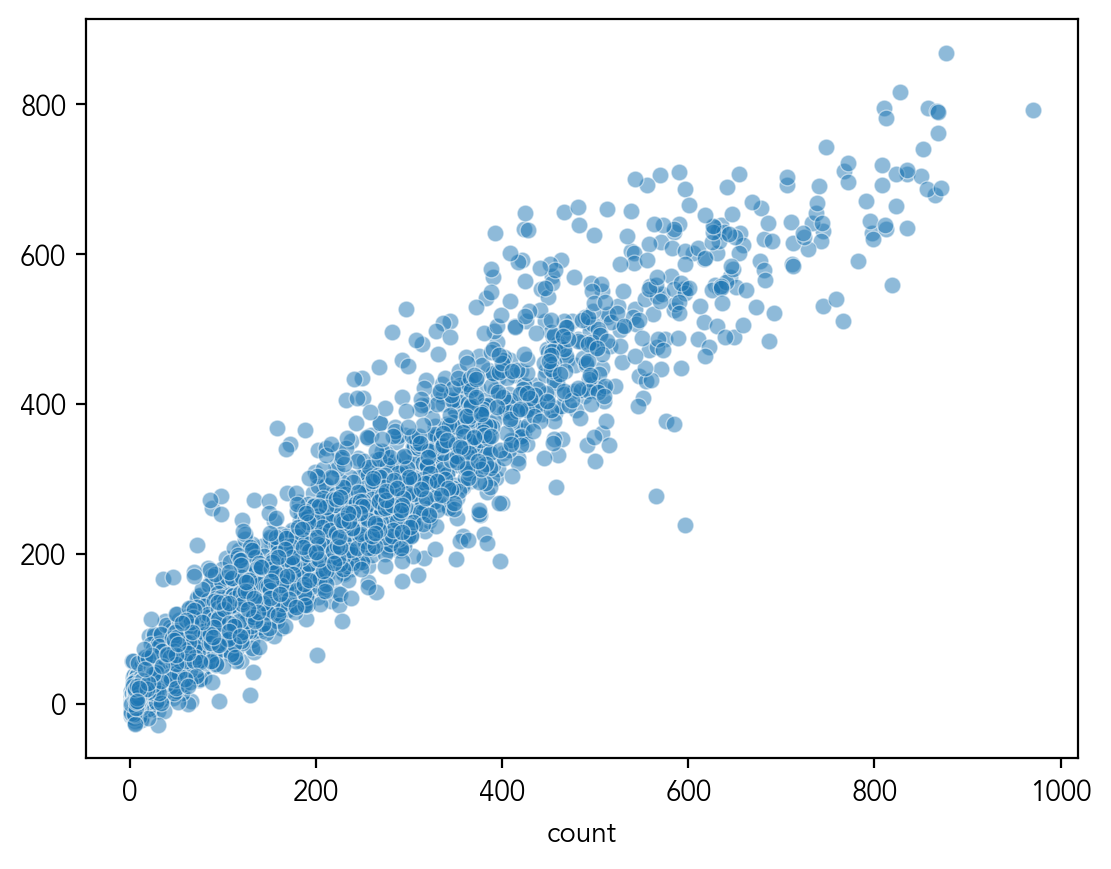

In [85]:
sns.scatterplot(x = y_test, y = pred_xgb, alpha = 0.5)

Text(0, 0.5, 'Predicted Count')

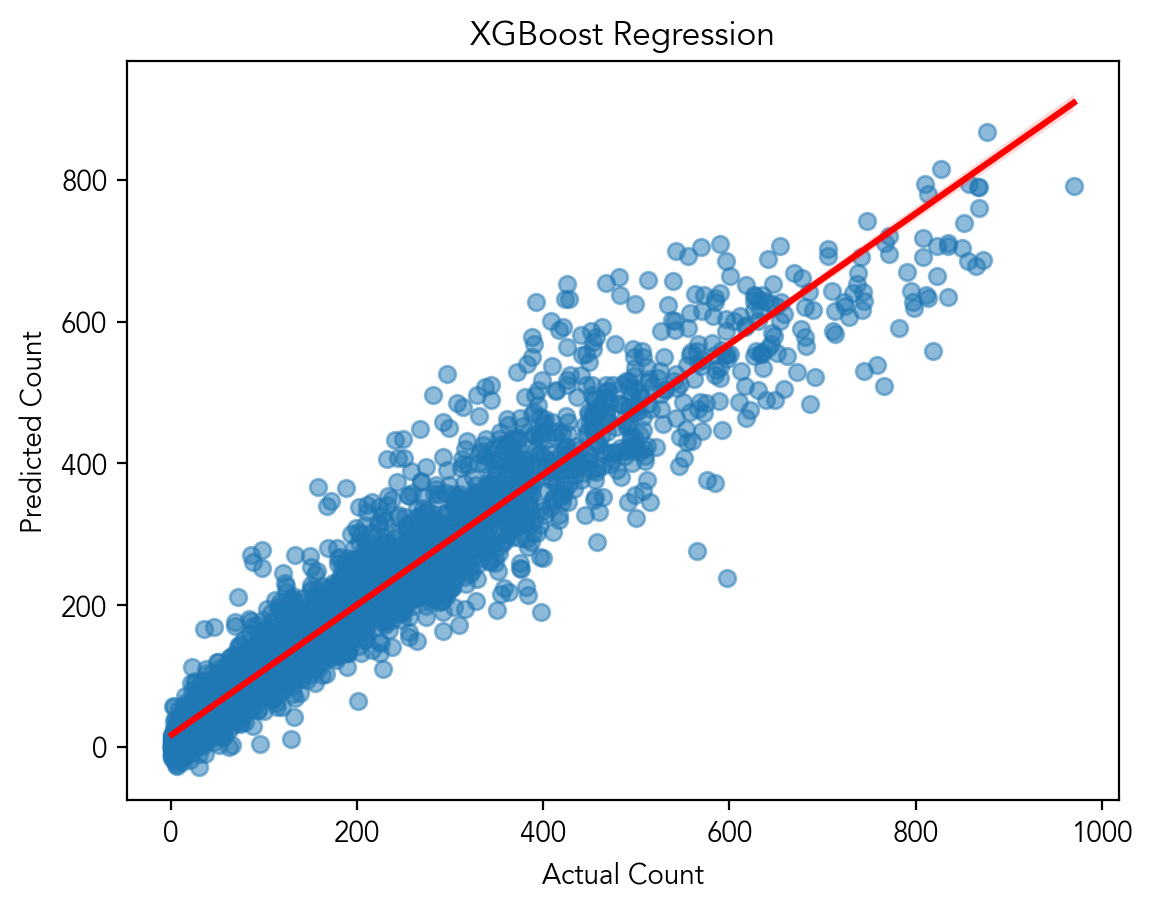

In [86]:
sns.regplot(data = bike_df_scale, x = y_test, y = pred_xgb,line_kws = {'color' : 'red'}, scatter_kws = {'alpha' : 0.5})
plt.title('XGBoost Regression')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')

## Performance of Models

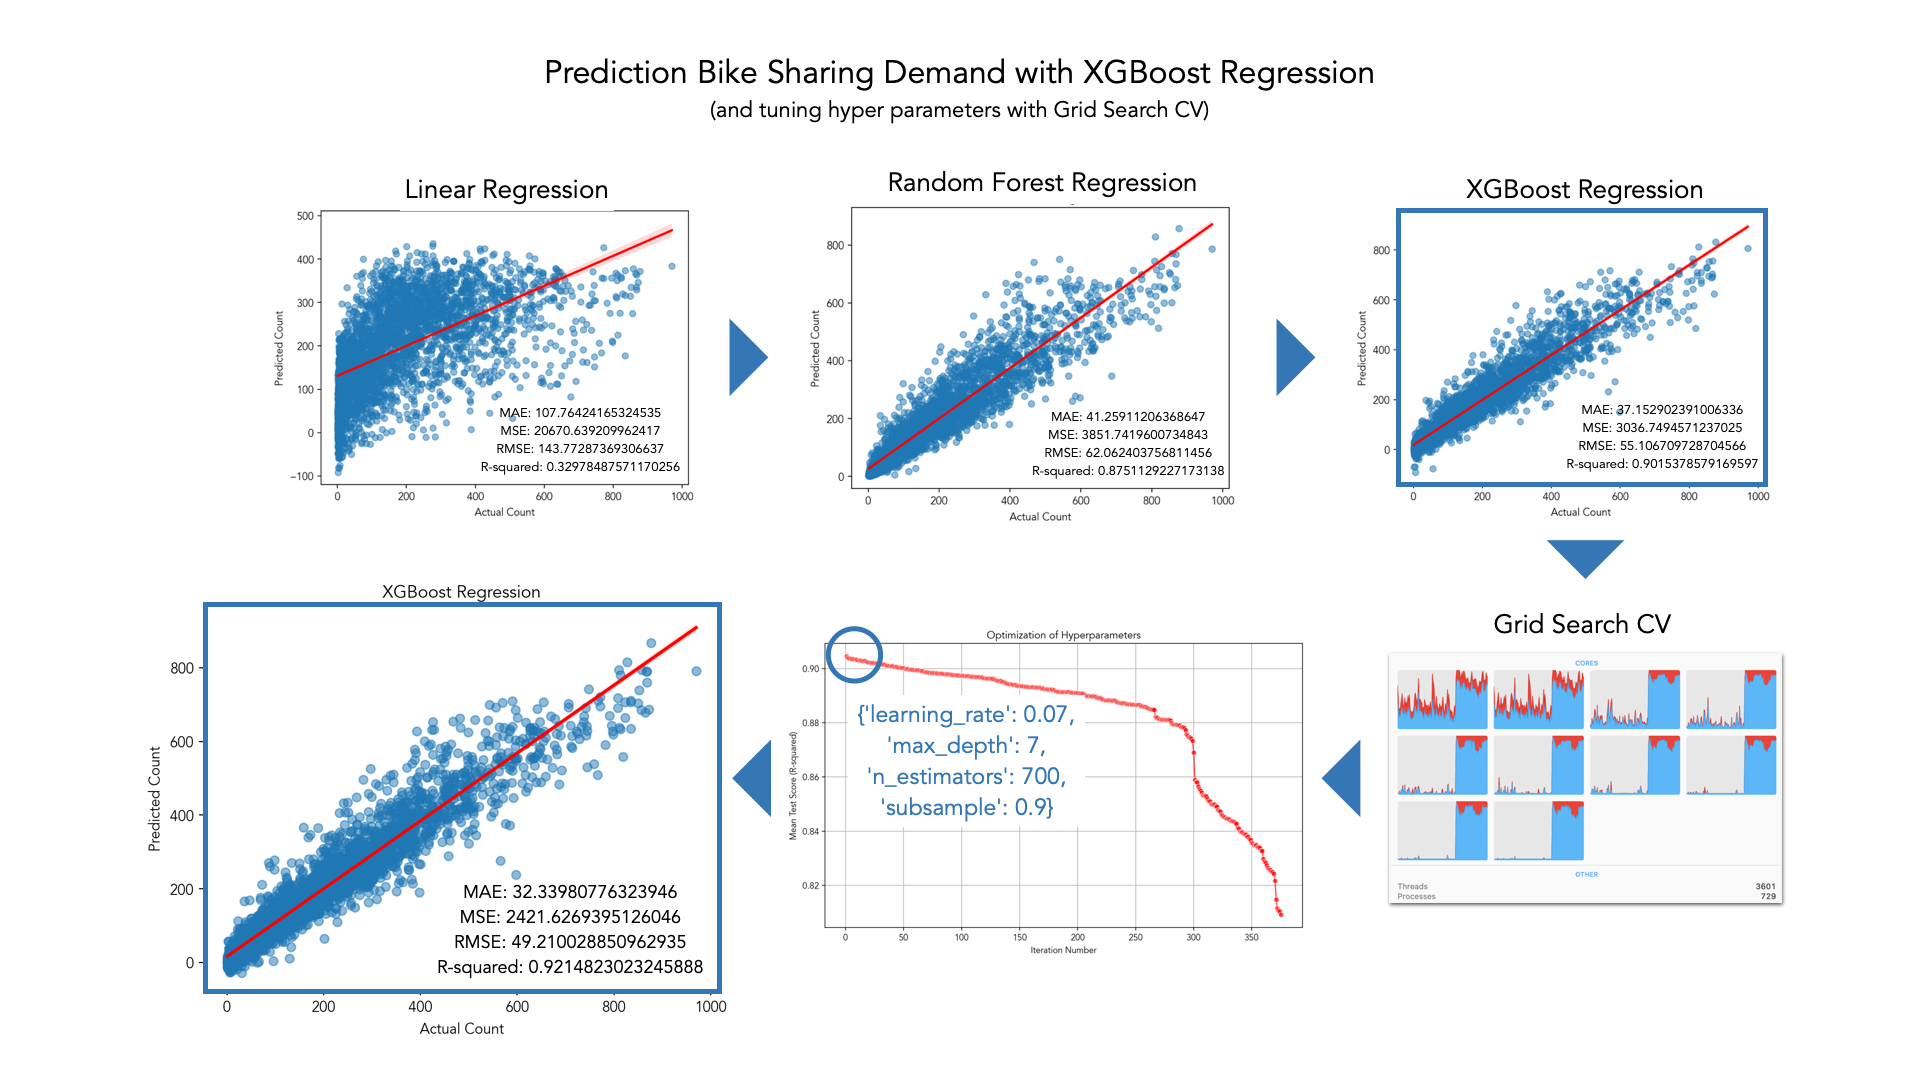